# Pymaceuticals Inc.
---

### Analysis


- The scatter plot shows the relationship between mouse weight and the average tumor volume for mice treated with the Capomulin regimen. The regression line shows that there is a correlation of weight and tumor volume. When the weight is higher, the tumor volume is also higher.
- When looking at the box plots there looks to be an outlier for the Infubinol treatment.
- The box plot also shows that the Capomulin treatment and the Ramicane treatment both have the lowest average tumor volume.
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

study_combined = pd.merge(study_results,mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
study_combined.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [47]:
# Checking the number of mice.
mice_count = len(pd.unique(study_combined['Mouse ID']))
print(mice_count)

249


In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_combined[study_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

print(repr(duplicate_mouse_ids))


array(['g989'], dtype=object)


In [49]:
# Optional: Get all the data for the duplicate mouse ID.

# Get the IDs of duplicate mice
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_combined[~study_combined['Mouse ID'].isin(duplicate_mouse_ids)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [51]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(pd.unique(clean_df['Mouse ID']))
print(new_mice_count)

248


## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate summary statistics
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": grouped.mean(),
    "Median Tumor Volume": grouped.median(),
    "Tumor Volume Variance": grouped.var(),
    "Tumor Volume Std. Dev.": grouped.std(),
    "Tumor Volume Std. Err": grouped.sem()  # Standard Error of the Mean
})

# Display the summary statistics DataFrame
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

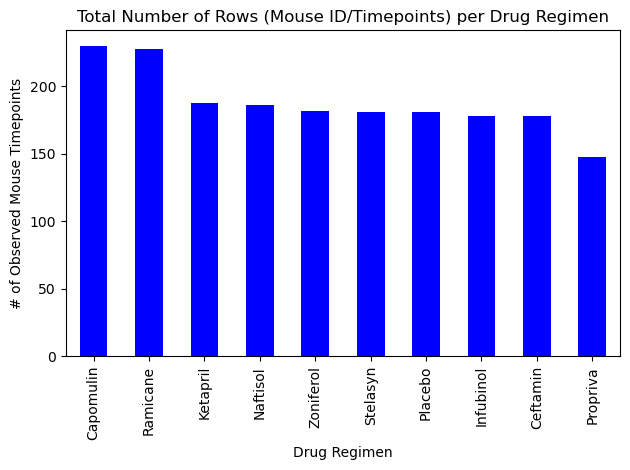

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot
drug_counts.plot(kind='bar', color='blue')

# Add labels and title
plt.title('Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.tight_layout()
plt.show()


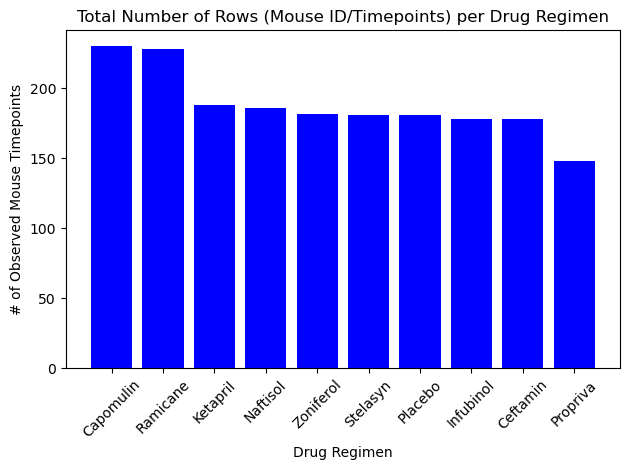

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df['Drug Regimen'].value_counts()

# Plot using pyplot
plt.bar(drug_counts.index, drug_counts.values, color='blue')

# Add labels and title
plt.title('Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Show the plot 
plt.tight_layout()
plt.show()

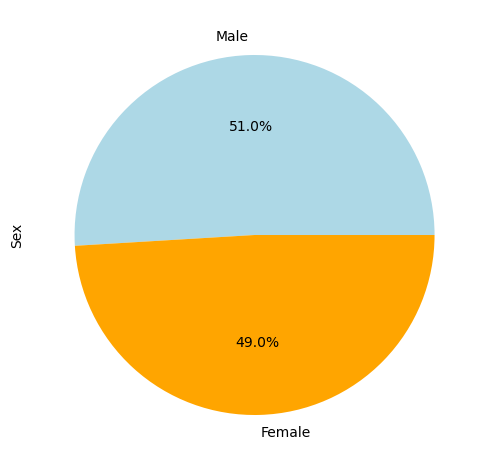

In [56]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_df['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['lightblue', 'orange'], labels=['Male', 'Female'])


# Ensure the pie chart is a circle  plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


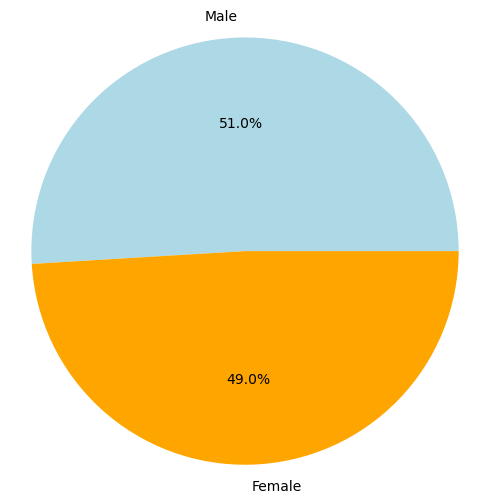

In [57]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_counts = clean_df['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['lightblue', 'orange'])

plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_great_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = last_great_timepoint.merge( clean_df, on=['Mouse ID', 'Timepoint'], how='left')

merged_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []

# Loop through each treatment
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(treatment_data)


# Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1


    # Determine outliers using upper and lower bounds

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

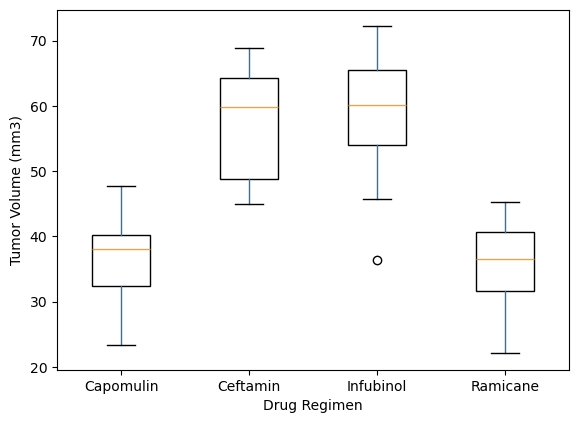

In [60]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatments)]
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, patch_artist=True, 
                    boxprops=dict(facecolor="white", color="black"), medianprops=dict(color="orange"))

# Customize the plot
plt.title('')
plt.suptitle("")
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

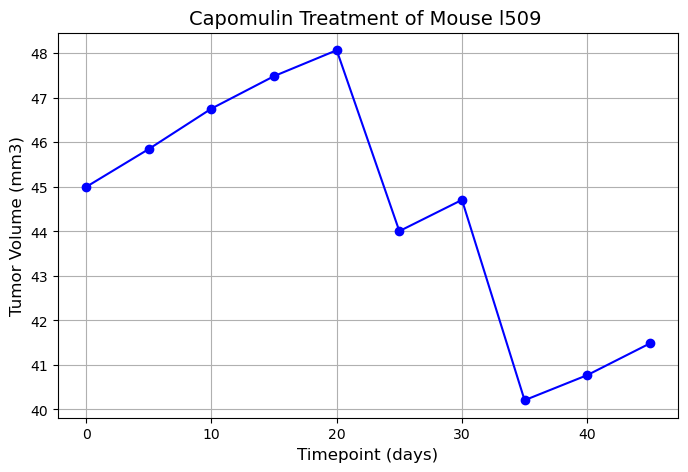

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
mouse_data = clean_df[clean_df["Mouse ID"] == mouse_id]

# Generate the line plot
plt.figure(figsize=(8, 5))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", color="blue", linestyle="-")

# Customize the plot
plt.title(f"Capomulin Treatment of Mouse {mouse_id} ", fontsize=14)
plt.xlabel("Timepoint (days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.grid(True)
plt.show()

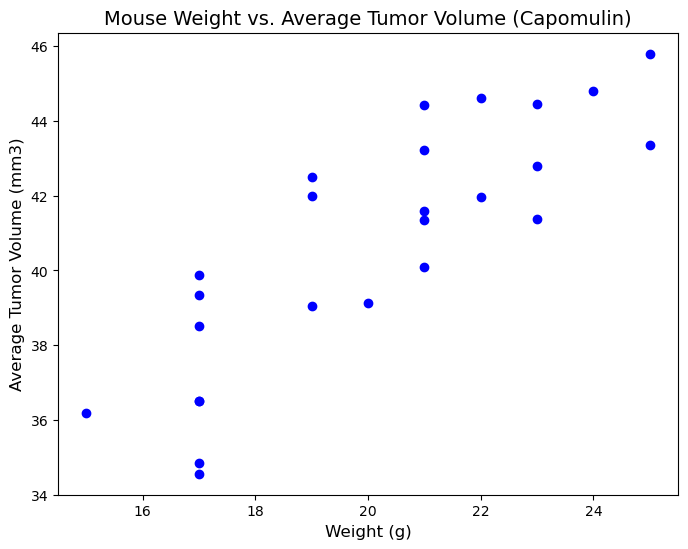

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter for Capomulin regimen
from scipy.stats import linregress
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID to calculate average tumor volume and weight
average_data = capomulin_data.groupby("Mouse ID").mean()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)


plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


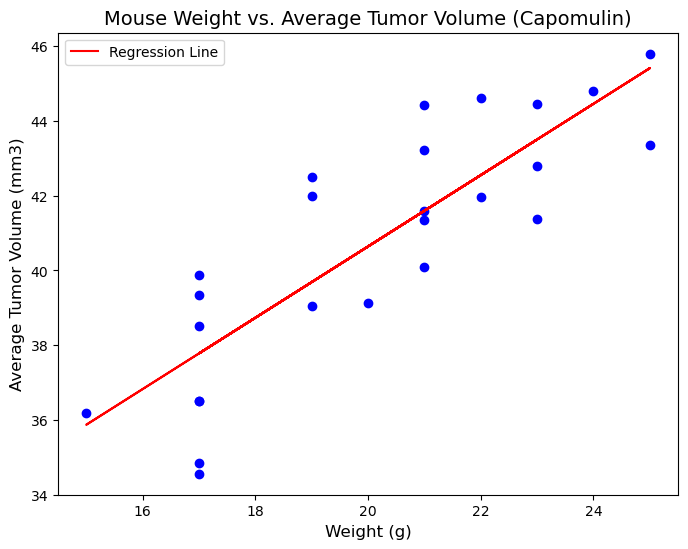

In [63]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter for Capomulin regimen
from scipy.stats import linregress
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID to calculate average tumor volume and weight
average_data = capomulin_data.groupby("Mouse ID").mean()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

# Correlation coefficient
correlation = average_data["Weight (g)"].corr(average_data["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    average_data["Weight (g)"], average_data["Tumor Volume (mm3)"]
)
regress_values = slope * average_data["Weight (g)"] + intercept

# Plot the regression line
plt.plot(
    average_data["Weight (g)"], regress_values, color="red", label="Regression Line"
)
plt.legend()
plt.show()